# Breast Cancer Sınıflandıma 
       

In [64]:
# Kütüphaneleri Çağrıma

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [65]:
# veri settine çağrıp okutmak
df=pd.read_csv('C:/Users/user/Downloads/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Veri set hakkinde özet ve NA or missing value var mi ?

In [66]:
df.shape

(569, 33)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [68]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [69]:
# missing value var mi ? 'Unnamed: 32' unimportent column
df=df.drop('Unnamed: 32',axis=1)
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

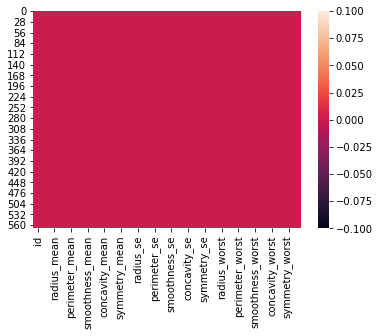

In [70]:
sns.heatmap(df.isnull())

Bu Veri sette missing value yoktur.

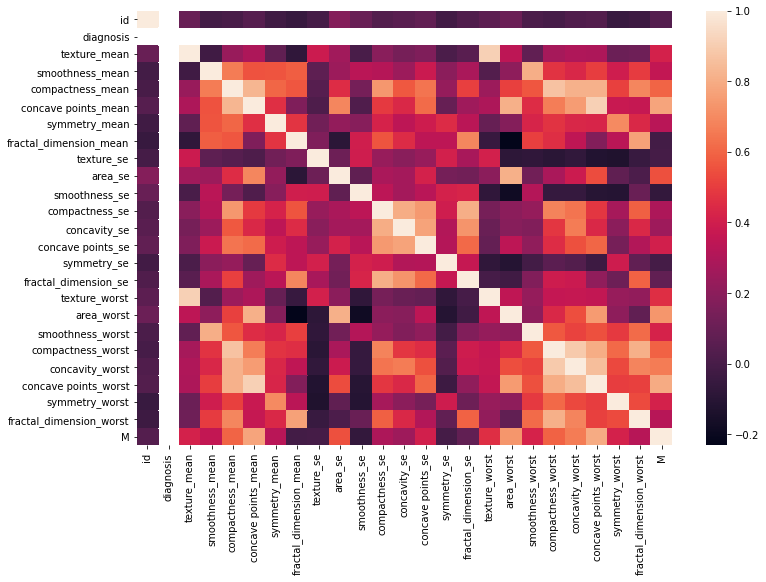

In [279]:
# satır ve süttün arasindaki ilişkisi
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

## Data Preprocessing

In [72]:
df.shape

(569, 32)

Burada hangi tur veriler var ['M' 'B']


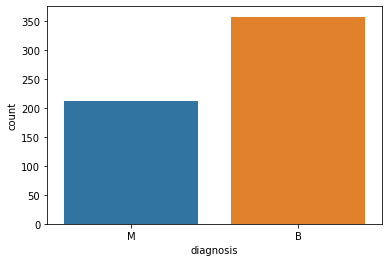

In [73]:
# target values inceleyelim
print('Burada hangi tur veriler var',df.diagnosis.unique())
# veriler imbalance mi yani nasil ?
sns.countplot('diagnosis',data =df)


In [74]:
# string valueleri integer cevirmaliyim
# Birnci yol Dummy EnCoder kullanarak
dummy = pd.get_dummies(df.diagnosis,drop_first=True)
dummy.head()

,M
0,1
1,1
2,1
3,1
4,1


In [167]:
df= pd.concat([df,dummy],axis=1)

In [169]:
df.head()

,id,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,...,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,842302,0,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,...,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,0,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,...,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,0,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,...,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,0,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,...,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,0,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,...,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [170]:
len(df.diagnosis==1)

569

In [171]:
# Highly correlated features silalim
corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any (tri_df[x]>0.92)]
df= df.drop(to_drop,axis=1)

In [172]:
df.shape

(569, 25)

## Model training 

In [174]:
x = df.drop(['diagnosis','M'],axis='columns')
y = df.M

### Use Scaler

In [175]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
x = scaler2.fit_transform(x)

In [176]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

### Decission Tree

In [177]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [230]:
score1 = DTC.score(xtest,ytest)

### Confusion Matrix

In [191]:
# confusion matrix ile accuracy bakalim 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
pred=DTC.predict(xtest)

In [202]:
print('Accuracy Score :',accuracy_score(ytest,pred))
print('R squre Score :',r2_score(ytest,pred))
print('classification_report :',classification_report(ytest,pred))

print('Confusion Matrix: ')
confusion_matrix(ytest,pred)

Accuracy Score : 0.951048951048951
R squre Score : 0.7901467505241091
classification_report :               precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Confusion Matrix: 


array([[85,  5],
       [ 2, 51]], dtype=int64)

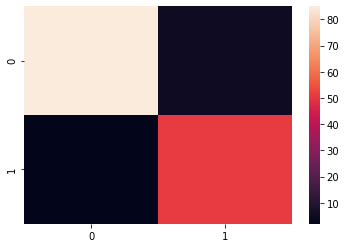

In [203]:
sns.heatmap(confusion_matrix(ytest,pred))

### Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xtrain, ytrain)

LogisticRegression()

In [234]:
score2 = LR.score(xtest,ytest)

In [232]:
pred1=LR.predict(xtest)
print('Accuracy Score :',accuracy_score(ytest,pred1))
print('R squre Score :',r2_score(ytest,pred1))
print('classification_report :',classification_report(ytest,pred1))

print('Confusion Matrix: ')
confusion_matrix(ytest,pred1)

Accuracy Score : 0.986013986013986
R squre Score : 0.940041928721174
classification_report :               precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix: 


array([[89,  1],
       [ 1, 52]], dtype=int64)

### K-Nearest Neighbors (KNN)

In [233]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [259]:
score3 = KNN.score(xtest,ytest)
pred2=KNN.predict(xtest)

In [236]:
print('Accuracy Score :',accuracy_score(ytest,pred2))
print('R squre Score :',r2_score(ytest,pred2))
print('classification_report :',classification_report(ytest,pred2))

print('Confusion Matrix: ')
confusion_matrix(ytest,pred2)

Accuracy Score : 0.9440559440559441
R squre Score : 0.760167714884696
classification_report :               precision    recall  f1-score   support

           0       0.94      0.98      0.96        90
           1       0.96      0.89      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143

Confusion Matrix: 


array([[88,  2],
       [ 6, 47]], dtype=int64)

### Support Vector Classifier (SVC)

In [237]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [238]:
svc= SVC()
param= {
    'gamma' : [.00001,.0001,.001,.01,.1],
    'C' : [1,10,15,20]
}
grid_search = GridSearchCV(svc,param)

grid_search.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 15, 20],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]})

In [256]:
score4 = grid_search.score(xtest,ytest)
pred3=grid_search.predict(xtest)

In [247]:
print('Accuracy Score :',accuracy_score(ytest,pred3))
print('R squre Score :',r2_score(ytest,pred3))
print('classification_report :',classification_report(ytest,pred3))

print('Confusion Matrix: ')
confusion_matrix(ytest,pred3)

Accuracy Score : 0.993006993006993
R squre Score : 0.970020964360587
classification_report :               precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.98      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix: 


array([[90,  0],
       [ 1, 52]], dtype=int64)

### Hangi Model Daha iyi Accuracy Veriyor 
#### Karşılaşma

In [278]:
models= pd.DataFrame({
    'model': ['Decision Tree','Logistic Regression','K-NN','SVC'],
    'Score':['0.98601','0.98601','0.94405','0.99300']
    })
mm=models.sort_values(by='Score',ascending=False)
mm

,model,Score
3,SVC,0.99300
0,Decision Tree,0.98601
1,Logistic Regression,0.98601
2,K-NN,0.94405


Sonuç olarak 4 tane algoridom kullandık ve hangilerin ACC nasıl Yükaridaki tabloda göstermektedir.